In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [35]:
cwd = os.getcwd()
cwd

'/Users/user/Desktop/SPL/BritishAirways/T2'

In [37]:
df = pd.read_csv(cwd+"/cleaned_cust_booking.csv", index_col=0)
df = df.reset_index(drop=True)
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [39]:
df_final = df

In [41]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

encoded_df = pd.DataFrame(encoder.fit_transform(df[["sales_channel"]]))
encoded_df = encoded_df.rename(columns={0: 'Internet', 1: 'Mobile'})
df_final = df_final.join(encoded_df)

encoded_df = pd.DataFrame(encoder.fit_transform(df[["trip_type"]]))
encoded_df = encoded_df.rename(columns={0:'RoundTrip', 1:'OneWayTrip', 2:'CircleTrip'})
df_final = df_final.join(encoded_df)

In [43]:
df_final.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,Internet,Mobile,RoundTrip,OneWayTrip,CircleTrip
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,1.0,0.0,0.0,0.0,1.0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,1.0,0.0,0.0,0.0,1.0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,1.0,0.0,0.0,0.0,1.0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,1.0,0.0,0.0,0.0,1.0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,1.0,0.0,0.0,0.0,1.0


In [47]:
df_final.drop(['sales_channel', 'trip_type', 'booking_origin', 'route'], axis=1, inplace=True)

KeyError: "['sales_channel', 'trip_type', 'booking_origin', 'route'] not found in axis"

In [51]:
df_final.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,Internet,Mobile,RoundTrip,OneWayTrip,CircleTrip
0,2,262,19,7,6,1,0,0,5.52,0,1.0,0.0,0.0,0.0,1.0
1,1,112,20,3,6,0,0,0,5.52,0,1.0,0.0,0.0,0.0,1.0
2,2,243,22,17,3,1,1,0,5.52,0,1.0,0.0,0.0,0.0,1.0
3,1,96,31,4,6,0,0,1,5.52,0,1.0,0.0,0.0,0.0,1.0
4,2,68,22,15,3,1,0,1,5.52,0,1.0,0.0,0.0,0.0,1.0


In [55]:
#store the label for supervised learning
label = df['booking_complete']

In [57]:
df_final = df_final.drop('booking_complete', axis=1)

In [61]:
df_final.head(5)

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTrip,OneWayTrip,CircleTrip
0,2,262,19,7,6,1,0,0,5.52,1.0,0.0,0.0,0.0,1.0
1,1,112,20,3,6,0,0,0,5.52,1.0,0.0,0.0,0.0,1.0
2,2,243,22,17,3,1,1,0,5.52,1.0,0.0,0.0,0.0,1.0
3,1,96,31,4,6,0,0,1,5.52,1.0,0.0,0.0,0.0,1.0
4,2,68,22,15,3,1,0,1,5.52,1.0,0.0,0.0,0.0,1.0


## Normalizaing the values

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_scaled = scaler.fit_transform(df_final)
df_scaled = pd.DataFrame(df_scaled, columns = df_final.columns)

df_scaled['label'] = label
df_scaled

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTrip,OneWayTrip,CircleTrip,label
0,0.400664,1.971140,-0.119589,-0.381586,1.096816,0.703597,-0.649991,-0.863460,-1.173938,0.35579,-0.35579,-0.048236,-0.088345,0.100836,0
1,-0.579461,0.302975,-0.089172,-1.120658,1.096816,-1.421268,-0.649991,-0.863460,-1.173938,0.35579,-0.35579,-0.048236,-0.088345,0.100836,0
2,0.400664,1.759839,-0.028336,1.466094,-0.408639,0.703597,1.538484,-0.863460,-1.173938,0.35579,-0.35579,-0.048236,-0.088345,0.100836,0
3,-0.579461,0.125038,0.245422,-0.935890,1.096816,-1.421268,-0.649991,1.158131,-1.173938,0.35579,-0.35579,-0.048236,-0.088345,0.100836,0
4,0.400664,-0.186353,-0.028336,1.096558,-0.408639,0.703597,-0.649991,1.158131,-1.173938,0.35579,-0.35579,-0.048236,-0.088345,0.100836,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49967,0.400664,-0.642317,-0.515018,-0.012050,1.096816,0.703597,-0.649991,1.158131,-1.107130,0.35579,-0.35579,-0.048236,-0.088345,0.100836,0
49968,-0.579461,0.291854,-0.515018,-0.935890,1.598635,-1.421268,-0.649991,-0.863460,-1.107130,0.35579,-0.35579,-0.048236,-0.088345,0.100836,0
49969,-0.579461,-0.675681,-0.515018,2.389935,1.096816,-1.421268,-0.649991,1.158131,-1.107130,0.35579,-0.35579,-0.048236,-0.088345,0.100836,0
49970,-0.579461,-0.775771,-0.515018,0.357486,-1.412275,0.703597,-0.649991,1.158131,-1.107130,0.35579,-0.35579,-0.048236,-0.088345,0.100836,0


## Correlation Matrix

<Axes: >

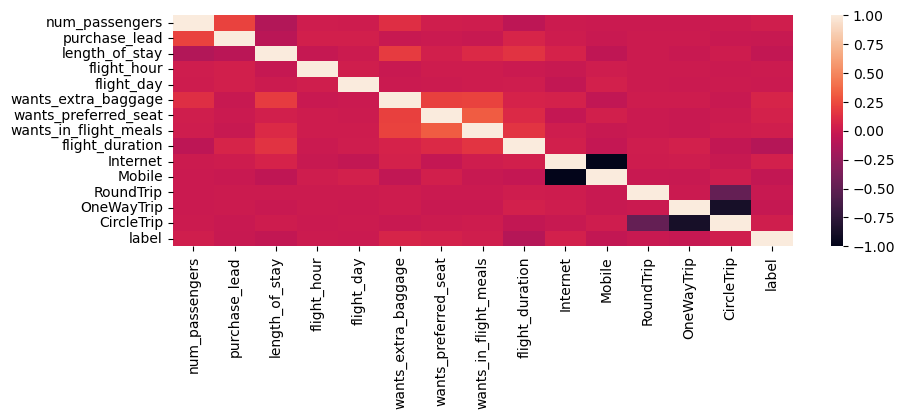

In [75]:
corr = df_scaled.corr()
plt.figure(figsize=(10,3))

sns.heatmap(corr)

## Splitting Train and Test Data

In [88]:
from sklearn.model_selection import train_test_split

X = df_scaled.drop(columns=['label'])
Y = df_scaled['label']

X_train, X_test, Y_train, Y_test = train_test_split(X.to_numpy(), Y.to_numpy(), test_size=0.20, random_state=42)

In [92]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.inspection import permutation_importance

from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import GridSearchCV,  RepeatedStratifiedKFold

In [96]:
"""
    Create functions to fit and predict the values of whether customer would complete the booking.
    Also functions with metrics to evaluate the model prediction.

"""

def model_fit_predict(model, X, Y, X_predict):
    model.fit(X, Y)
    return model.predict(X_predict)

def acc_score(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

def pre_score(y_true, y_pred):
    return precision_score(y_true, y_pred)

def f_score(y_true, y_pred):
    return f1_score(y_true, y_pred)

## Random Forest Classifier

In [103]:
clf_rf = RandomForestClassifier(max_depth = 50, min_samples_split = 5, random_state = 12)

### Checking Model Accuracy

In [112]:
y_pred_train = model_fit_predict(clf_rf, X_train, Y_train, X_train)
set(y_pred_train)

#f1 score for training data
f1 = round(f1_score(Y_train, y_pred_train),2) 

#accuracy score for training data
acc = round(accuracy_score(Y_train, y_pred_train),2) 

#precision score for training data
pre = round(precision_score(Y_train, y_pred_train),2) 

print(f"Accuracy, precision and f1-score for training data are {acc}, {pre} and {f1} respectively")

Accuracy, precision and f1-score for training data are 0.93, 1.0 and 0.71 respectively


0.9335868124171398

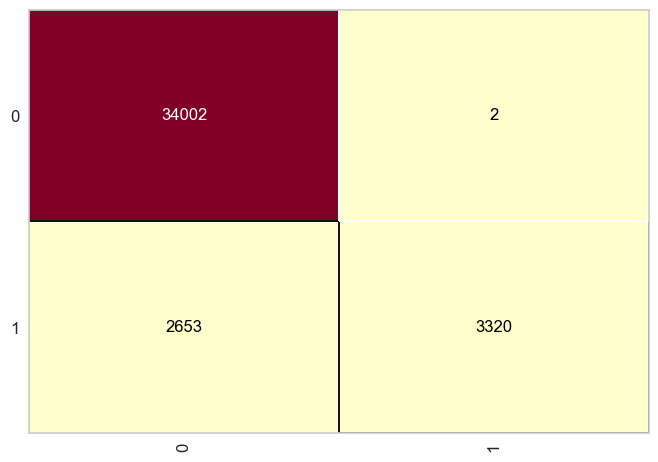

In [118]:
conMet = ConfusionMatrix(clf_rf, classes=[0,1])
conMet.fit(X_train, Y_train)

conMet.score(X_train, Y_train)

# __Predicted(+ve)_|____Predicted(-ve)___|_____________
#  True Positive   |  False Negative     | Actual(+ve)
#  False Positive  |  True Negative      |Actual(-ve)

### Checking Testing Accuracy

In [121]:
clf_rf = RandomForestClassifier(max_depth=50, min_samples_split=5, random_state=12)

In [125]:
y_pred_test = model_fit_predict(clf_rf, X_train, Y_train, X_test)

# f1 score for training data
f1 = round(f1_score(Y_test, y_pred_test), 2)

# accuracy score for training data
acc = round(accuracy_score(Y_test, y_pred_test),2)

# precision score for training data
pre = round(precision_score(Y_test, y_pred_test),2)

print(f"Accuracy, precision and f1-score for training data are {acc}, {pre} and {f1} respectively")

Accuracy, precision and f1-score for training data are 0.85, 0.54 and 0.08 respectively


0.8507253626813407

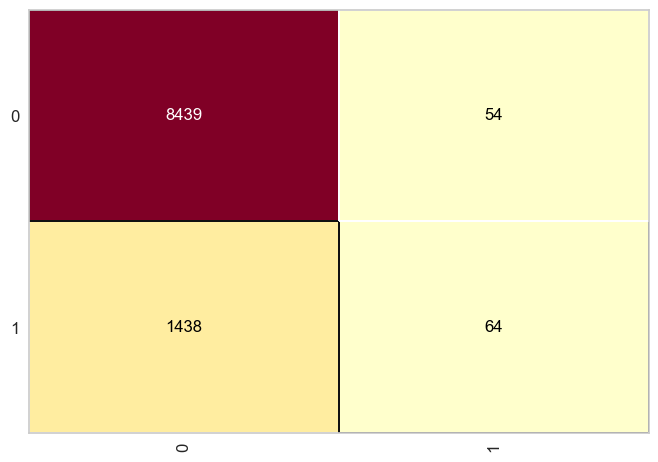

In [131]:
conMet = ConfusionMatrix(clf_rf, classes=[0,1])
conMet.fit(X_train, Y_train)

conMet.score(X_test, Y_test)

Text(0.5, 0, 'Random Forest Feature Importance')

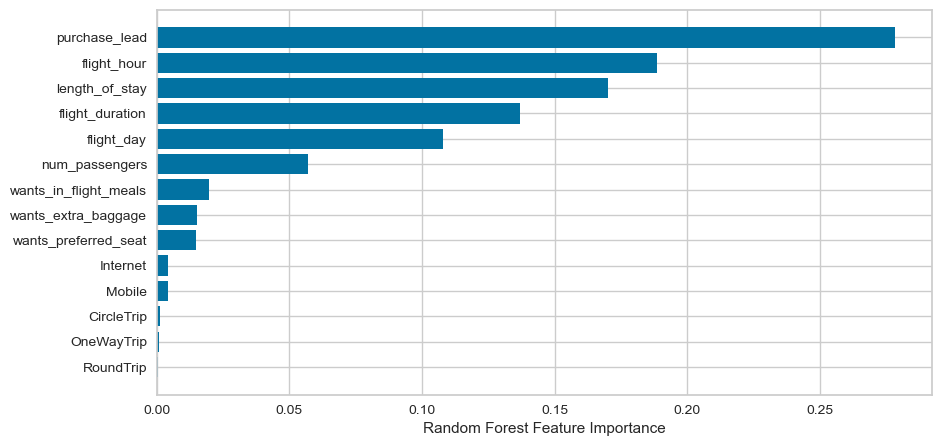

In [133]:
plt.figure(figsize=(10,5))
sorted_idx = clf_rf.feature_importances_.argsort()
plt.barh(df_scaled.iloc[:,:-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

## Balancing The Dataset

In [136]:
df_scaled.label.value_counts()

label
0    42497
1     7475
Name: count, dtype: int64

In [138]:
#create a dataframe having all labels 0 with 8000 samples
df_scaled_0 = df_scaled[df_scaled.label == 0].sample(n=8000)

#concatenate the two dataframee, one havng all labels 0 and other having all labels as 1
df_scaled_new = pd.concat([df_scaled[df_scaled.label==1], df_scaled_0], ignore_index=True)
#shuffle the dataframe rows
df_scaled_new = df_scaled_new.sample(frac = 1).reset_index(drop=True)

In [140]:
df_scaled_new

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTrip,OneWayTrip,CircleTrip,label
0,-0.579461,-0.564470,-0.515018,0.172718,1.096816,0.703597,-0.649991,1.158131,0.195638,0.355790,-0.355790,-0.048236,-0.088345,0.100836,1
1,-0.579461,-0.319806,-0.575854,-0.381586,-0.408639,0.703597,1.538484,1.158131,0.870405,0.355790,-0.355790,-0.048236,-0.088345,0.100836,0
2,0.400664,-0.686802,-0.545436,1.096558,0.594998,0.703597,-0.649991,-0.863460,-1.741812,0.355790,-0.355790,-0.048236,-0.088345,0.100836,1
3,-0.579461,-0.720165,-0.606271,0.542254,-1.412275,-1.421268,-0.649991,-0.863460,-0.632789,0.355790,-0.355790,-0.048236,-0.088345,0.100836,1
4,-0.579461,-0.931466,-0.575854,0.542254,1.096816,0.703597,1.538484,-0.863460,0.870405,0.355790,-0.355790,-0.048236,-0.088345,0.100836,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15470,-0.579461,-0.920345,-0.545436,-0.935890,-1.412275,-1.421268,-0.649991,-0.863460,-0.185171,0.355790,-0.355790,-0.048236,-0.088345,0.100836,1
15471,0.400664,-0.064021,-0.515018,-0.196818,0.093180,0.703597,1.538484,1.158131,-0.439044,0.355790,-0.355790,-0.048236,-0.088345,0.100836,0
15472,-0.579461,-0.831376,-0.606271,-0.012050,0.594998,0.703597,-0.649991,1.158131,-1.741812,0.355790,-0.355790,-0.048236,-0.088345,0.100836,0
15473,0.400664,0.147280,-0.545436,1.281326,0.594998,0.703597,-0.649991,-0.863460,-1.741812,-2.810646,2.810646,-0.048236,-0.088345,0.100836,0


In [142]:
X = df_scaled_new.iloc[:,:-1]
Y = df_scaled_new['label']
X_train, X_test, Y_train, Y_test = train_test_split(X.to_numpy() ,Y.to_numpy(), test_size=0.2, random_state=12)

In [144]:
clf_rf = RandomForestClassifier(n_estimators=50, max_depth =50, min_samples_split=5, random_state=12)

In [148]:
y_pred_test = model_fit_predict(clf_rf, X_train, Y_train, X_test)

#f1 score for training data
f1 = round(f1_score(Y_test, y_pred_test),2) 

#accuracy score for training data
acc = round(accuracy_score(Y_test, y_pred_test),2) 

#precision score for training data
pre = round(precision_score(Y_test, y_pred_test),2) 

recall = round(recall_score(Y_test, y_pred_test),2)

specificity = round(recall_score(Y_test, y_pred_test, pos_label=0),2)

print(f"Accuracy, precision, recall, specificity and f1-score for training data are {acc}, {pre}, {recall}, {specificity} and {f1} respectively") 

Accuracy, precision, recall, specificity and f1-score for training data are 0.62, 0.61, 0.59, 0.65 and 0.6 respectively


0.6222940226171244

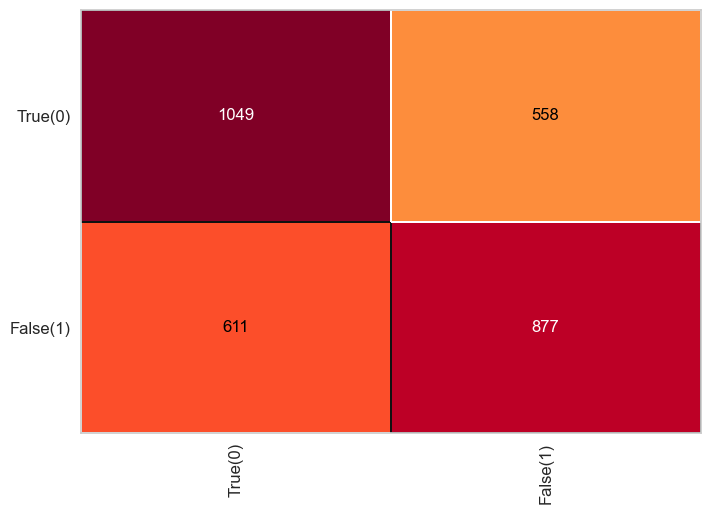

In [156]:
cm = ConfusionMatrix(clf_rf, classes=['True(0)','False(1)'])
# cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, Y_train)

cm.score(X_test, Y_test)

Text(0.5, 0, 'Random Forest Feature Importance')

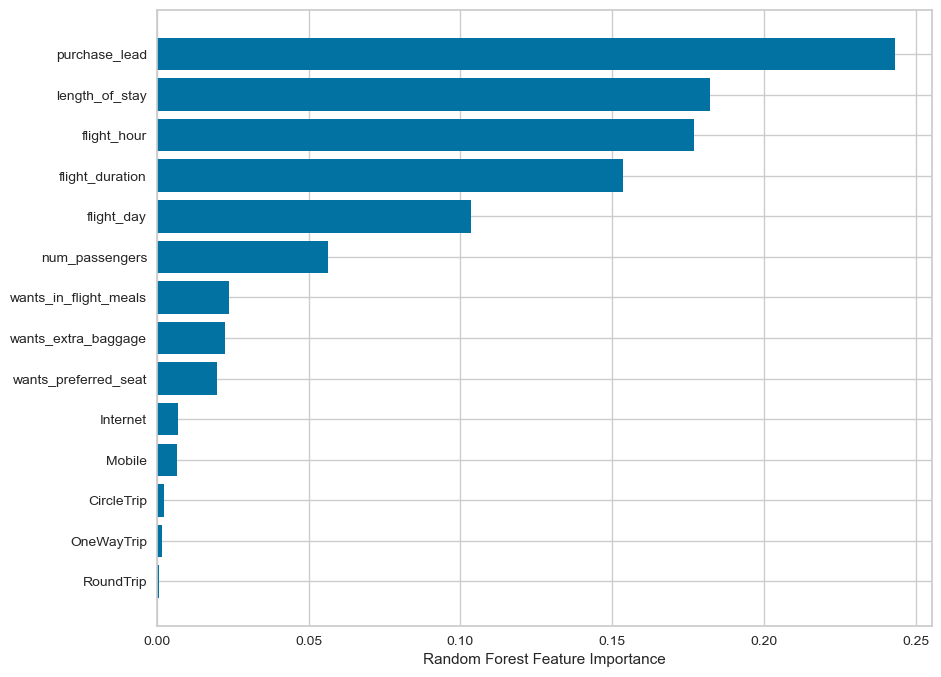

In [160]:
plt.figure(figsize=(10,8))
sorted_idx = clf_rf.feature_importances_.argsort()
plt.barh(df_scaled.iloc[:,:-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")